In [2]:
!pip install opendatasets jovian numpy pandas matplotlib seaborn scikit-learn pyarrow xgboost

In [3]:
#Dataset from kaggle
#https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data

In [4]:
import os
import opendatasets as od
import jovian
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

%matplotlib inline
matplotlib.rcParams['font.size'] = 14
sns.set_style('whitegrid')

In [5]:
stores_df = pd.read_csv('stores.csv')
train_df = pd.read_csv('train.csv')
submission_df = pd.read_csv('sampleSubmission.csv')
features_df = pd.read_csv('features.csv')
test_df = pd.read_csv('test.csv')

In [6]:
stores_df

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [7]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [8]:
submission_df

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0
...,...,...
115059,45_98_2013-06-28,0
115060,45_98_2013-07-05,0
115061,45_98_2013-07-12,0
115062,45_98_2013-07-19,0


In [9]:
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [10]:
test_df

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [11]:
#Exploratory Data Aanalysis EDA

In [12]:
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [13]:
stores_df



,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [14]:
full_features_df = features_df.merge(stores_df, how='inner', on='Store')

In [15]:
full_features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221


In [16]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [17]:
test_df

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [18]:
train_val_df = train_df.merge(full_features_df, how='inner', on=['Store', 'Date', 'IsHoliday'])

In [19]:
test_df = test_df.merge(full_features_df, how='inner', on=['Store', 'Date', 'IsHoliday'])

In [20]:
train_val_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [21]:
test_df

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115060,45,94,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115061,45,95,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115062,45,97,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221


In [22]:
del full_features_df, train_df, features_df, stores_df

In [23]:
train_val_df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

In [24]:
test_df.dtypes

Store             int64
Dept              int64
Date             object
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

In [25]:
train_val_df.Date = pd.to_datetime(train_val_df.Date)
test_df.Date = pd.to_datetime(test_df.Date)

In [26]:
train_val_df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
dtype: object

In [27]:
test_df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
dtype: object

In [28]:
train_val_df['Week'] = train_val_df.Date.dt.week
train_val_df['Month'] = train_val_df.Date.dt.month
train_val_df['Year'] = train_val_df.Date.dt.year

/tmp/ipykernel_829/3875164742.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train_val_df['Week'] = train_val_df.Date.dt.week


In [29]:
train_val_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,10,2012
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,10,2012
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,10,2012
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,10,2012


In [30]:
test_df['Week'] = test_df.Date.dt.week
test_df['Month'] = test_df.Date.dt.month
test_df['Year'] = test_df.Date.dt.year
test_df

/tmp/ipykernel_829/1059291016.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test_df['Week'] = test_df.Date.dt.week


,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,30,7,2013
115060,45,94,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,30,7,2013
115061,45,95,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,30,7,2013
115062,45,97,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,30,7,2013


In [31]:
train_val_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [32]:
train_val_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Month,Year
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739,25.826762,6.449510,2010.968591
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328,14.151887,3.243217,0.796876
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,1.000000,1.000000,2010.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000,14.000000,4.000000,2010.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,26.000000,6.000000,2011.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000,38.000000,9.000000,2012.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,52.000000,12.000000,2012.000000


In [33]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  bool          
 4   Temperature   115064 non-null  float64       
 5   Fuel_Price    115064 non-null  float64       
 6   MarkDown1     114915 non-null  float64       
 7   MarkDown2     86437 non-null   float64       
 8   MarkDown3     105235 non-null  float64       
 9   MarkDown4     102176 non-null  float64       
 10  MarkDown5     115064 non-null  float64       
 11  CPI           76902 non-null   float64       
 12  Unemployment  76902 non-null   float64       
 13  Type          115064 non-null  object        
 14  Size          115064 non-null  int64         
 15  Week          115

In [34]:
test_df.describe()

,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Month,Year
count,115064.000000,115064.000000,115064.000000,115064.000000,114915.000000,86437.000000,105235.000000,102176.000000,115064.000000,76902.000000,76902.000000,115064.000000,115064.000000,115064.000000,115064.000000
mean,22.238207,44.339524,53.941804,3.581546,7689.216439,3734.051729,2403.088666,3356.219071,3922.681189,176.961347,6.868733,136497.688921,23.050963,5.729855,2012.767182
std,12.809930,30.656410,18.724153,0.239442,10698.760716,8323.495014,13767.939313,7570.501545,19445.150745,41.239967,1.583427,61106.926438,15.750407,3.590331,0.422629
min,1.000000,1.000000,-7.290000,2.872000,-2781.450000,-35.740000,-179.260000,0.220000,-185.170000,131.236226,3.684000,34875.000000,1.000000,1.000000,2012.000000
25%,11.000000,18.000000,39.820000,3.431000,1966.460000,180.350000,15.100000,155.460000,1309.300000,138.402033,5.771000,93638.000000,10.000000,3.000000,2013.000000
50%,22.000000,37.000000,54.470000,3.606000,4842.290000,742.590000,78.260000,840.940000,2390.430000,192.304445,6.806000,140167.000000,20.000000,5.000000,2013.000000
75%,33.000000,74.000000,67.350000,3.766000,9439.140000,2735.670000,272.580000,3096.920000,4227.270000,223.244532,8.036000,202505.000000,30.000000,7.000000,2013.000000
max,45.000000,99.000000,101.950000,4.125000,103184.980000,71074.170000,149483.310000,65344.640000,771448.100000,228.976456,10.199000,219622.000000,52.000000,12.000000,2013.000000


In [35]:
train_val_df.Year.value_counts()

2011    153453
2010    140679
2012    127438
Name: Year, dtype: int64

In [36]:
test_df.Year.value_counts()

2013    88275
2012    26789
Name: Year, dtype: int64

In [37]:
train_val_df.Type.value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

In [38]:
test_df.Type.value_counts()

A    58713
B    44500
C    11851
Name: Type, dtype: int64

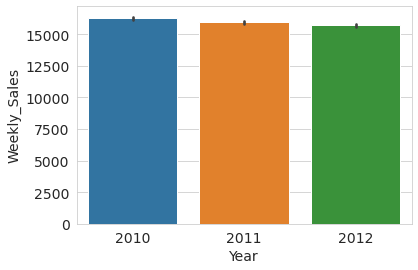

In [39]:
sns.barplot(x='Year', y='Weekly_Sales', data=train_val_df);

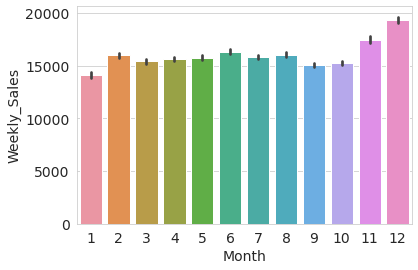

In [40]:
sns.barplot(x='Month', y='Weekly_Sales', data=train_val_df);

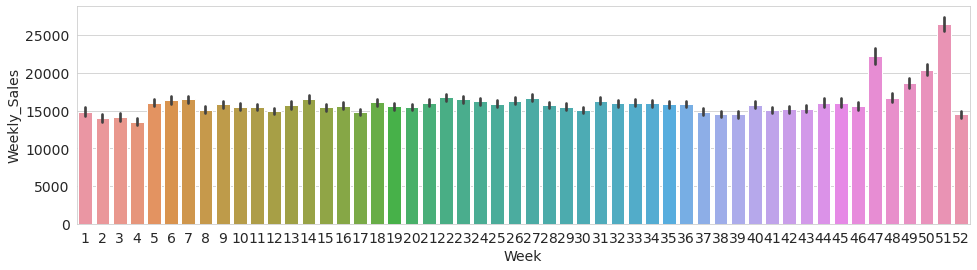

In [41]:
plt.figure(figsize=(16, 4))
sns.barplot(x='Week', y='Weekly_Sales', data=train_val_df);

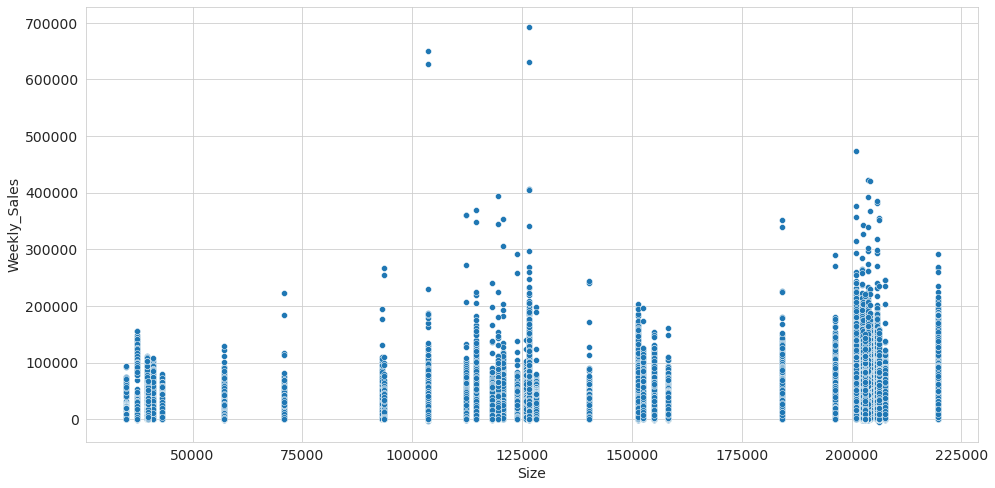

In [42]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Size',
                y='Weekly_Sales', data=train_val_df);

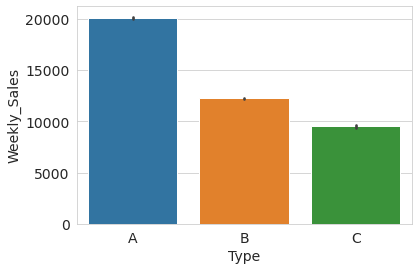

In [43]:
sns.barplot(x='Type', y='Weekly_Sales', data=train_val_df);

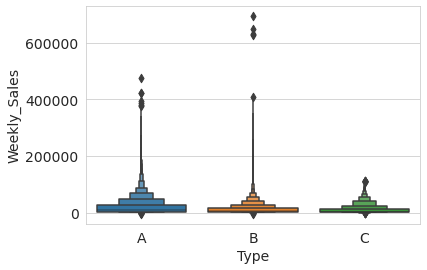

In [44]:
sns.boxenplot(x='Type', y='Weekly_Sales', data=train_val_df);

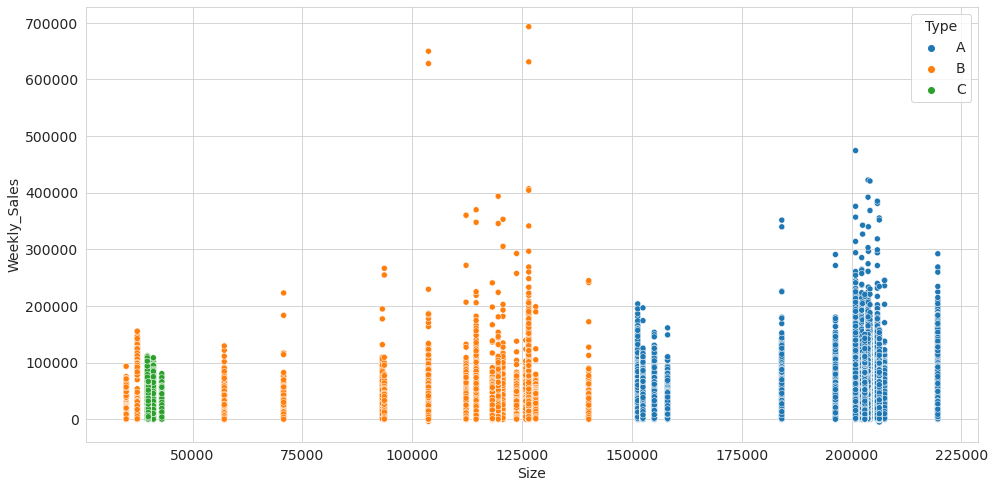

In [45]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Size', y='Weekly_Sales', hue='Type', data=train_val_df);

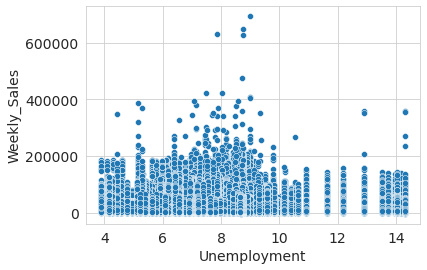

In [46]:
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=train_val_df);

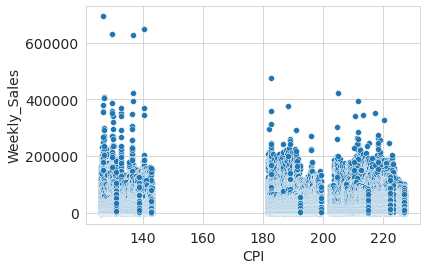

In [47]:
sns.scatterplot(x='CPI', y='Weekly_Sales', data=train_val_df);

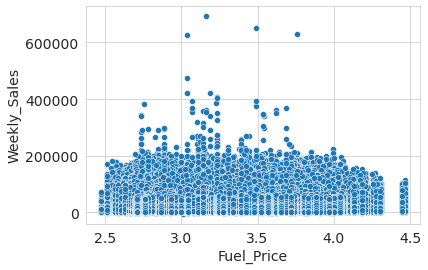

In [48]:
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=train_val_df);

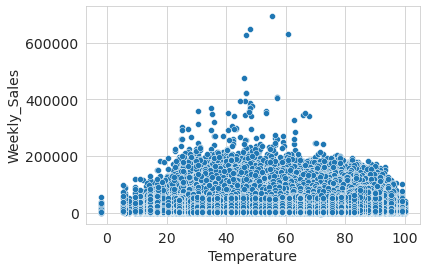

In [49]:
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=train_val_df);

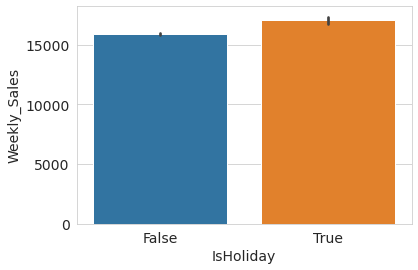

In [50]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=train_val_df);

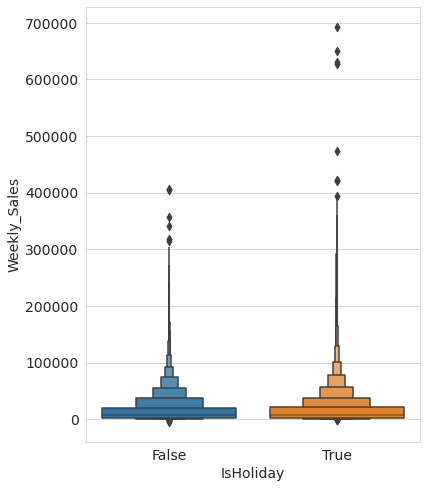

In [51]:
plt.figure(figsize=(6,8))
sns.boxenplot(x='IsHoliday', y='Weekly_Sales', data=train_val_df);

In [52]:
#CORRELATION

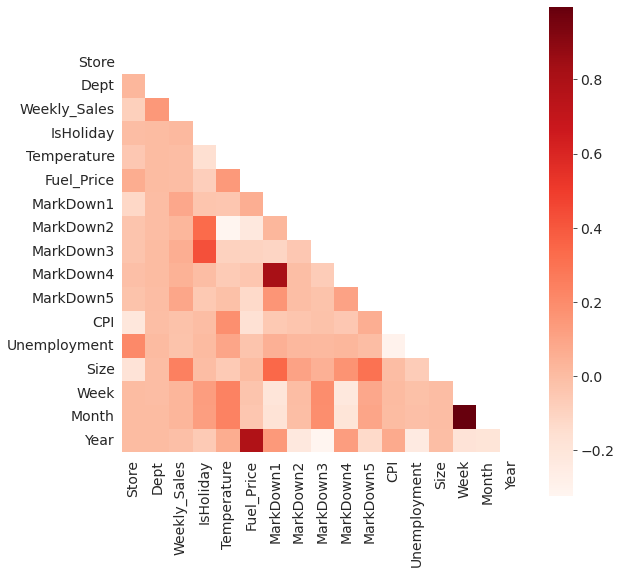

In [53]:
plt.figure(figsize=(9, 9))
sns.heatmap(train_val_df.corr(), square=True, cmap='Reds',
            mask = np.triu(np.ones_like(train_val_df.corr(), dtype='bool')));

In [54]:
train_val_df.Year.value_counts()

2011    153453
2010    140679
2012    127438
Name: Year, dtype: int64

In [55]:
train_df = train_val_df[train_val_df.Year < 2012]
val_df = train_val_df[train_val_df.Year == 2012]

In [56]:
input_cols = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI',
              'Unemployment', 'Type', 'Size', 'Week']
target_col = 'Weekly_Sales'

In [57]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [58]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [59]:
test_inputs = test_df[input_cols].copy()

In [60]:
train_inputs

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Week
0,1,1,False,42.31,2.572,211.096358,8.106,A,151315,5
1,1,2,False,42.31,2.572,211.096358,8.106,A,151315,5
2,1,3,False,42.31,2.572,211.096358,8.106,A,151315,5
3,1,4,False,42.31,2.572,211.096358,8.106,A,151315,5
4,1,5,False,42.31,2.572,211.096358,8.106,A,151315,5
...,...,...,...,...,...,...,...,...,...,...
418660,45,93,True,37.79,3.389,189.062016,8.523,B,118221,52
418661,45,94,True,37.79,3.389,189.062016,8.523,B,118221,52
418662,45,95,True,37.79,3.389,189.062016,8.523,B,118221,52
418663,45,97,True,37.79,3.389,189.062016,8.523,B,118221,52


In [61]:
train_targets

0         24924.50
1         50605.27
2         13740.12
3         39954.04
4         32229.38
            ...   
418660     1426.52
418661     2979.03
418662    42084.36
418663     5569.82
418664      553.21
Name: Weekly_Sales, Length: 294132, dtype: float64

In [62]:
val_inputs

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Week
7169,1,1,False,49.01,3.157,219.714258,7.348,A,151315,1
7170,1,2,False,49.01,3.157,219.714258,7.348,A,151315,1
7171,1,3,False,49.01,3.157,219.714258,7.348,A,151315,1
7172,1,4,False,49.01,3.157,219.714258,7.348,A,151315,1
7173,1,5,False,49.01,3.157,219.714258,7.348,A,151315,1
...,...,...,...,...,...,...,...,...,...,...
421565,45,93,False,58.85,3.882,192.308899,8.667,B,118221,43
421566,45,94,False,58.85,3.882,192.308899,8.667,B,118221,43
421567,45,95,False,58.85,3.882,192.308899,8.667,B,118221,43
421568,45,97,False,58.85,3.882,192.308899,8.667,B,118221,43


In [63]:
val_targets

7169      16567.69
7170      44481.38
7171      13926.04
7172      40925.76
7173      23105.81
            ...   
421565     2487.80
421566     5203.31
421567    56017.47
421568     6817.48
421569     1076.80
Name: Weekly_Sales, Length: 127438, dtype: float64

In [64]:
test_inputs

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Week
0,1,1,False,55.32,3.386,223.462779,6.573,A,151315,44
1,1,2,False,55.32,3.386,223.462779,6.573,A,151315,44
2,1,3,False,55.32,3.386,223.462779,6.573,A,151315,44
3,1,4,False,55.32,3.386,223.462779,6.573,A,151315,44
4,1,5,False,55.32,3.386,223.462779,6.573,A,151315,44
...,...,...,...,...,...,...,...,...,...,...
115059,45,93,False,76.06,3.804,NaN,NaN,B,118221,30
115060,45,94,False,76.06,3.804,NaN,NaN,B,118221,30
115061,45,95,False,76.06,3.804,NaN,NaN,B,118221,30
115062,45,97,False,76.06,3.804,NaN,NaN,B,118221,30


In [65]:
numeric_cols = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size', 'Week']

In [66]:
categorical_cols = ['Type']

In [67]:
test_inputs.isna().sum() #missing numeric vals inputting in test_inputs

Store               0
Dept                0
IsHoliday           0
Temperature         0
Fuel_Price          0
CPI             38162
Unemployment    38162
Type                0
Size                0
Week                0
dtype: int64

In [68]:
imputer = SimpleImputer(strategy='mean').fit(test_inputs[numeric_cols])

In [69]:
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [70]:
test_inputs.isna().sum()

Store           0
Dept            0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
Week            0
dtype: int64

In [71]:
train_inputs.isna().sum()

Store           0
Dept            0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
Week            0
dtype: int64

In [72]:
val_inputs.isna().sum()

Store           0
Dept            0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
Week            0
dtype: int64

In [73]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "gowthamdagani1/wsf" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/gowthamdagani1/wsf


'https://jovian.ai/gowthamdagani1/wsf'

In [74]:
full_inputs_df = pd.concat([train_inputs, val_inputs, test_inputs])

In [75]:
scaler = MinMaxScaler().fit(full_inputs_df[numeric_cols])

In [76]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [77]:
train_inputs

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Week
0,0.0,0.000000,0.0,0.454046,0.050100,0.826259,0.416032,A,0.630267,0.078431
1,0.0,0.010204,0.0,0.454046,0.050100,0.826259,0.416032,A,0.630267,0.078431
2,0.0,0.020408,0.0,0.454046,0.050100,0.826259,0.416032,A,0.630267,0.078431
3,0.0,0.030612,0.0,0.454046,0.050100,0.826259,0.416032,A,0.630267,0.078431
4,0.0,0.040816,0.0,0.454046,0.050100,0.826259,0.416032,A,0.630267,0.078431
...,...,...,...,...,...,...,...,...,...,...
418660,1.0,0.938776,1.0,0.412669,0.459419,0.612152,0.455264,B,0.451136,1.000000
418661,1.0,0.948980,1.0,0.412669,0.459419,0.612152,0.455264,B,0.451136,1.000000
418662,1.0,0.959184,1.0,0.412669,0.459419,0.612152,0.455264,B,0.451136,1.000000
418663,1.0,0.979592,1.0,0.412669,0.459419,0.612152,0.455264,B,0.451136,1.000000


In [78]:
val_inputs

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Week
7169,0.0,0.000000,0.0,0.515379,0.343186,0.909999,0.344717,A,0.630267,0.000000
7170,0.0,0.010204,0.0,0.515379,0.343186,0.909999,0.344717,A,0.630267,0.000000
7171,0.0,0.020408,0.0,0.515379,0.343186,0.909999,0.344717,A,0.630267,0.000000
7172,0.0,0.030612,0.0,0.515379,0.343186,0.909999,0.344717,A,0.630267,0.000000
7173,0.0,0.040816,0.0,0.515379,0.343186,0.909999,0.344717,A,0.630267,0.000000
...,...,...,...,...,...,...,...,...,...,...
421565,1.0,0.938776,0.0,0.605456,0.706413,0.643701,0.468812,B,0.451136,0.823529
421566,1.0,0.948980,0.0,0.605456,0.706413,0.643701,0.468812,B,0.451136,0.823529
421567,1.0,0.959184,0.0,0.605456,0.706413,0.643701,0.468812,B,0.451136,0.823529
421568,1.0,0.979592,0.0,0.605456,0.706413,0.643701,0.468812,B,0.451136,0.823529


In [79]:
test_inputs

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Week
0,0.0,0.000000,0.0,0.573142,0.457916,0.946424,0.271804,A,0.630267,0.843137
1,0.0,0.010204,0.0,0.573142,0.457916,0.946424,0.271804,A,0.630267,0.843137
2,0.0,0.020408,0.0,0.573142,0.457916,0.946424,0.271804,A,0.630267,0.843137
3,0.0,0.030612,0.0,0.573142,0.457916,0.946424,0.271804,A,0.630267,0.843137
4,0.0,0.040816,0.0,0.573142,0.457916,0.946424,0.271804,A,0.630267,0.843137
...,...,...,...,...,...,...,...,...,...,...
115059,1.0,0.938776,0.0,0.762999,0.667335,0.494569,0.299627,B,0.451136,0.568627
115060,1.0,0.948980,0.0,0.762999,0.667335,0.494569,0.299627,B,0.451136,0.568627
115061,1.0,0.959184,0.0,0.762999,0.667335,0.494569,0.299627,B,0.451136,0.568627
115062,1.0,0.979592,0.0,0.762999,0.667335,0.494569,0.299627,B,0.451136,0.568627


In [80]:
train_inputs.describe().loc[['min', 'max']]

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Week
min,0.0,0.0,0.0,0.047876,0.000000,0.000000,0.069245,0.0,0.0
max,1.0,1.0,1.0,0.983431,0.871242,0.944353,1.000000,1.0,1.0


In [81]:
val_inputs.describe().loc[['min', 'max']]

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Week
min,0.0,0.0,0.0,0.135024,0.28006,0.039777,0.018346,0.0,0.000000
max,1.0,1.0,1.0,0.982790,1.00000,0.983057,0.799981,1.0,0.823529


In [82]:
test_inputs.describe().loc[['min', 'max']]

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Week
min,0.0,0.0,0.0,0.0,0.200401,0.050259,0.000000,0.0,0.0
max,1.0,1.0,1.0,1.0,0.828156,1.000000,0.612946,1.0,1.0


In [83]:
#Encoding

In [84]:
encoder = OneHotEncoder(sparse=False).fit(full_inputs_df[categorical_cols])

In [85]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [86]:
encoded_cols

['Type_A', 'Type_B', 'Type_C']

In [87]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [88]:
train_inputs

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Week,Type_A,Type_B,Type_C
0,0.0,0.000000,0.0,0.454046,0.050100,0.826259,0.416032,A,0.630267,0.078431,1.0,0.0,0.0
1,0.0,0.010204,0.0,0.454046,0.050100,0.826259,0.416032,A,0.630267,0.078431,1.0,0.0,0.0
2,0.0,0.020408,0.0,0.454046,0.050100,0.826259,0.416032,A,0.630267,0.078431,1.0,0.0,0.0
3,0.0,0.030612,0.0,0.454046,0.050100,0.826259,0.416032,A,0.630267,0.078431,1.0,0.0,0.0
4,0.0,0.040816,0.0,0.454046,0.050100,0.826259,0.416032,A,0.630267,0.078431,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
418660,1.0,0.938776,1.0,0.412669,0.459419,0.612152,0.455264,B,0.451136,1.000000,0.0,1.0,0.0
418661,1.0,0.948980,1.0,0.412669,0.459419,0.612152,0.455264,B,0.451136,1.000000,0.0,1.0,0.0
418662,1.0,0.959184,1.0,0.412669,0.459419,0.612152,0.455264,B,0.451136,1.000000,0.0,1.0,0.0
418663,1.0,0.979592,1.0,0.412669,0.459419,0.612152,0.455264,B,0.451136,1.000000,0.0,1.0,0.0


In [89]:
val_inputs

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Week,Type_A,Type_B,Type_C
7169,0.0,0.000000,0.0,0.515379,0.343186,0.909999,0.344717,A,0.630267,0.000000,1.0,0.0,0.0
7170,0.0,0.010204,0.0,0.515379,0.343186,0.909999,0.344717,A,0.630267,0.000000,1.0,0.0,0.0
7171,0.0,0.020408,0.0,0.515379,0.343186,0.909999,0.344717,A,0.630267,0.000000,1.0,0.0,0.0
7172,0.0,0.030612,0.0,0.515379,0.343186,0.909999,0.344717,A,0.630267,0.000000,1.0,0.0,0.0
7173,0.0,0.040816,0.0,0.515379,0.343186,0.909999,0.344717,A,0.630267,0.000000,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,1.0,0.938776,0.0,0.605456,0.706413,0.643701,0.468812,B,0.451136,0.823529,0.0,1.0,0.0
421566,1.0,0.948980,0.0,0.605456,0.706413,0.643701,0.468812,B,0.451136,0.823529,0.0,1.0,0.0
421567,1.0,0.959184,0.0,0.605456,0.706413,0.643701,0.468812,B,0.451136,0.823529,0.0,1.0,0.0
421568,1.0,0.979592,0.0,0.605456,0.706413,0.643701,0.468812,B,0.451136,0.823529,0.0,1.0,0.0


In [90]:
test_inputs

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Week,Type_A,Type_B,Type_C
0,0.0,0.000000,0.0,0.573142,0.457916,0.946424,0.271804,A,0.630267,0.843137,1.0,0.0,0.0
1,0.0,0.010204,0.0,0.573142,0.457916,0.946424,0.271804,A,0.630267,0.843137,1.0,0.0,0.0
2,0.0,0.020408,0.0,0.573142,0.457916,0.946424,0.271804,A,0.630267,0.843137,1.0,0.0,0.0
3,0.0,0.030612,0.0,0.573142,0.457916,0.946424,0.271804,A,0.630267,0.843137,1.0,0.0,0.0
4,0.0,0.040816,0.0,0.573142,0.457916,0.946424,0.271804,A,0.630267,0.843137,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,1.0,0.938776,0.0,0.762999,0.667335,0.494569,0.299627,B,0.451136,0.568627,0.0,1.0,0.0
115060,1.0,0.948980,0.0,0.762999,0.667335,0.494569,0.299627,B,0.451136,0.568627,0.0,1.0,0.0
115061,1.0,0.959184,0.0,0.762999,0.667335,0.494569,0.299627,B,0.451136,0.568627,0.0,1.0,0.0
115062,1.0,0.979592,0.0,0.762999,0.667335,0.494569,0.299627,B,0.451136,0.568627,0.0,1.0,0.0


In [91]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [92]:
X_train

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Week,Type_A,Type_B,Type_C
0,0.0,0.000000,0.0,0.454046,0.050100,0.826259,0.416032,0.630267,0.078431,1.0,0.0,0.0
1,0.0,0.010204,0.0,0.454046,0.050100,0.826259,0.416032,0.630267,0.078431,1.0,0.0,0.0
2,0.0,0.020408,0.0,0.454046,0.050100,0.826259,0.416032,0.630267,0.078431,1.0,0.0,0.0
3,0.0,0.030612,0.0,0.454046,0.050100,0.826259,0.416032,0.630267,0.078431,1.0,0.0,0.0
4,0.0,0.040816,0.0,0.454046,0.050100,0.826259,0.416032,0.630267,0.078431,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
418660,1.0,0.938776,1.0,0.412669,0.459419,0.612152,0.455264,0.451136,1.000000,0.0,1.0,0.0
418661,1.0,0.948980,1.0,0.412669,0.459419,0.612152,0.455264,0.451136,1.000000,0.0,1.0,0.0
418662,1.0,0.959184,1.0,0.412669,0.459419,0.612152,0.455264,0.451136,1.000000,0.0,1.0,0.0
418663,1.0,0.979592,1.0,0.412669,0.459419,0.612152,0.455264,0.451136,1.000000,0.0,1.0,0.0


In [93]:
X_val

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Week,Type_A,Type_B,Type_C
7169,0.0,0.000000,0.0,0.515379,0.343186,0.909999,0.344717,0.630267,0.000000,1.0,0.0,0.0
7170,0.0,0.010204,0.0,0.515379,0.343186,0.909999,0.344717,0.630267,0.000000,1.0,0.0,0.0
7171,0.0,0.020408,0.0,0.515379,0.343186,0.909999,0.344717,0.630267,0.000000,1.0,0.0,0.0
7172,0.0,0.030612,0.0,0.515379,0.343186,0.909999,0.344717,0.630267,0.000000,1.0,0.0,0.0
7173,0.0,0.040816,0.0,0.515379,0.343186,0.909999,0.344717,0.630267,0.000000,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,1.0,0.938776,0.0,0.605456,0.706413,0.643701,0.468812,0.451136,0.823529,0.0,1.0,0.0
421566,1.0,0.948980,0.0,0.605456,0.706413,0.643701,0.468812,0.451136,0.823529,0.0,1.0,0.0
421567,1.0,0.959184,0.0,0.605456,0.706413,0.643701,0.468812,0.451136,0.823529,0.0,1.0,0.0
421568,1.0,0.979592,0.0,0.605456,0.706413,0.643701,0.468812,0.451136,0.823529,0.0,1.0,0.0


In [94]:
X_test

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Week,Type_A,Type_B,Type_C
0,0.0,0.000000,0.0,0.573142,0.457916,0.946424,0.271804,0.630267,0.843137,1.0,0.0,0.0
1,0.0,0.010204,0.0,0.573142,0.457916,0.946424,0.271804,0.630267,0.843137,1.0,0.0,0.0
2,0.0,0.020408,0.0,0.573142,0.457916,0.946424,0.271804,0.630267,0.843137,1.0,0.0,0.0
3,0.0,0.030612,0.0,0.573142,0.457916,0.946424,0.271804,0.630267,0.843137,1.0,0.0,0.0
4,0.0,0.040816,0.0,0.573142,0.457916,0.946424,0.271804,0.630267,0.843137,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
115059,1.0,0.938776,0.0,0.762999,0.667335,0.494569,0.299627,0.451136,0.568627,0.0,1.0,0.0
115060,1.0,0.948980,0.0,0.762999,0.667335,0.494569,0.299627,0.451136,0.568627,0.0,1.0,0.0
115061,1.0,0.959184,0.0,0.762999,0.667335,0.494569,0.299627,0.451136,0.568627,0.0,1.0,0.0
115062,1.0,0.979592,0.0,0.762999,0.667335,0.494569,0.299627,0.451136,0.568627,0.0,1.0,0.0


In [95]:
folder = 'processed_data/'
X_train.to_parquet(folder + 'X_train.parquet')
pd.DataFrame(train_targets).to_parquet(folder + 'train_targets.parquet')

X_val.to_parquet(folder + 'X_val.parquet')
pd.DataFrame(val_targets).to_parquet(folder + 'val_targets.parquet')

X_test.to_parquet(folder + 'X_test.parquet')

In [96]:
folder = 'processed_data/'

X_train = pd.read_parquet(folder + 'X_train.parquet')
train_targets = pd.read_parquet(folder + 'train_targets.parquet')['Weekly_Sales']

X_val = pd.read_parquet(folder + 'X_val.parquet')
val_targets = pd.read_parquet(folder + 'val_targets.parquet')['Weekly_Sales']

X_test = pd.read_parquet(folder + 'X_test.parquet')

In [97]:
print(X_train.shape)
print(train_targets.shape)

print(X_val.shape)
print(val_targets.shape)

print(X_test.shape)

(294132, 12)
(294132,)
(127438, 12)
(127438,)
(115064, 12)


In [ ]:
rand_forest1 = RandomForestRegressor(random_state=42, n_jobs=-1)

In [ ]:
rand_forest1.fit(X_train, train_targets)

In [ ]:
weights_train = X_train.IsHoliday.apply(lambda x: 5 if x else 1)
weights_val = X_val.IsHoliday.apply(lambda x: 5 if x else 1)

In [ ]:
train_wmae = np.sum(np.multiply(abs(train_targets - rand_forest1.predict(X_train)), weights_train)) / (np.sum(weights_train))
val_wmae = np.sum(np.multiply(abs(val_targets - rand_forest1.predict(X_val)), weights_val)) / (np.sum(weights_val))
train_wmae, val_wmae

In [ ]:
#helperfunctions

In [ ]:
def test_param(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    weights_train = X_train.IsHoliday.apply(lambda x: 5 if x else 1)
    weights_val = X_val.IsHoliday.apply(lambda x: 5 if x else 1)
    train_wmae = np.sum(np.multiply(abs(train_targets - model.predict(X_train)), weights_train)) / (np.sum(weights_train))
    val_wmae = np.sum(np.multiply(abs(val_targets - model.predict(X_val)), weights_val)) / (np.sum(weights_val))
    return train_wmae, val_wmae

In [ ]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], []
    
    # Computing and appending the errors
    for value in param_values:
        param = {param_name: value}
        train_wmae, val_wmae = test_param(**param)
        train_errors.append(train_wmae)
        val_errors.append(val_wmae)
        
    # Printing the errors for each parameter value
    print("Param_values:", param_values)
    print("Training_errors:", train_errors)
    print('Validation_errors:', val_errors)
    
    # Plotting the overfitting curve for the parameter
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Weighted Mean Absolute Error (WMAE)')
    plt.legend(['Training', 'Validation'])

In [ ]:
test_param_and_plot('n_estimators', [60, 100, 140, 180, 220])

In [ ]:
test_param_and_plot('max_depth', [20, 30, 40, 50])

In [ ]:
test_param_and_plot('max_features', [6, 8, 9, 10, 11, 12])

In [ ]:
random_forest_regressor_model = RandomForestRegressor(n_estimators=220, max_depth=30, max_features=10,
                                                      n_jobs=-1, random_state=42).fit(X_train, train_targets)

In [ ]:
test_param(n_estimators=220, max_depth=30, max_features=10)

In [ ]:
random_forest_regressor_model.score(X_train, train_targets)

In [ ]:
random_forest_regressor_model.score(X_val, val_targets)

In [ ]:
importances_rf_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': random_forest_regressor_model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importances_rf_df

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importances_rf_df, x='importance', y='feature');

In [ ]:
#GB regression model

In [ ]:
xgb1 = XGBRegressor(random_state=42, n_jobs=-1).fit(X_train, train_targets)

In [ ]:
weights_train = X_train.IsHoliday.apply(lambda x: 5 if x else 1)
weights_val = X_val.IsHoliday.apply(lambda x: 5 if x else 1)

In [ ]:
train_wmae = np.sum(np.multiply(abs(train_targets - xgb1.predict(X_train)), weights_train)) / (np.sum(weights_train))
val_wmae = np.sum(np.multiply(abs(val_targets - xgb1.predict(X_val)), weights_val)) / (np.sum(weights_val))
train_wmae, val_wmae

In [ ]:
def test_param_xgb(**params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    weights_train = X_train.IsHoliday.apply(lambda x: 5 if x else 1)
    weights_val = X_val.IsHoliday.apply(lambda x: 5 if x else 1)
    train_wmae = np.sum(np.multiply(abs(train_targets - model.predict(X_train)), weights_train)) / (np.sum(weights_train))
    val_wmae = np.sum(np.multiply(abs(val_targets - model.predict(X_val)), weights_val)) / (np.sum(weights_val))
    return train_wmae, val_wmae

In [ ]:
def test_param_and_plot_xgb(param_name, param_values):
    train_errors, val_errors = [], []
    
    # Computing and appending the errors
    for value in param_values:
        param = {param_name: value}
        train_wmae, val_wmae = test_param_xgb(**param)
        train_errors.append(train_wmae)
        val_errors.append(val_wmae)
        
    # Printing the errors for each parameter value
    print("Param_values:", param_values)
    print("Training_errors:", train_errors)
    print('Validation_errors:', val_errors)
    
    # Plotting the overfitting curve for the parameter
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Weighted Mean Absolute Error (WMAE)')
    plt.legend(['Training', 'Validation'])

In [ ]:
test_param_and_plot_xgb('n_estimators', [300, 400, 500, 600, 700])

In [ ]:
test_param_and_plot_xgb('max_depth', [10, 11, 12, 13, 14])

In [ ]:
test_param_and_plot_xgb('learning_rate', [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])

In [ ]:
gradient_boosting_regressor_model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=700,
                                                 max_depth=13, learning_rate=0.3).fit(X_train, train_targets)

In [ ]:
test_param_xgb(n_estimators=700, max_depth=13, learning_rate=0.3)

In [ ]:
gradient_boosting_regressor_model.score(X_train, train_targets)

In [ ]:
gradient_boosting_regressor_model.score(X_val, val_targets)

In [ ]:
importances_xgb_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': gradient_boosting_regressor_model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importances_xgb_df

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importances_xgb_df, x='importance', y='feature');

In [ ]:
#Performance report
X_test['Predicted_sales'] = random_forest_regressor_model.predict(X_test)
X_test.head(15)

In [ ]:
X_test.to_csv('Predictions.csv')

In [ ]:
joblib.dump(random_forest_regressor_model, 'random_forest_regressor_model.joblib')

In [98]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "gowthamdagani1/wsf" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/gowthamdagani1/wsf


'https://jovian.ai/gowthamdagani1/wsf'